In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados históricos de corridas
data = pd.read_csv('C:/Users/a1197/Documents/GitHub/Backend-techrac-e/techrace-backend/IA/formula_e_race_results.csv')

# Mostrar as primeiras linhas do CSV
data.head()


,season,race_num,race_name,race_date,driver,car,team,team_group,rank,rank_num,grid,laps,time_retired,pts_rank,pts_pole,pts_bonus,points
0,2,2,2015 Putrajaya,2015-11-07,Lucas di Grassi,11,ABT Schaeffler Audi Sport,Audi,1,1,6,33,50:17.449,25,0,0,25
1,1,4,2015 Buenos Aires,2015-01-10,António Félix da Costa,55,Amlin Aguri,Techeetah,1,1,8,35,48:52.100,25,0,0,25
2,5,1,2018 Ad Diriyah,2018-12-15,António Félix da Costa,28,Andretti-BMW,BMW-Andretti,1,1,1,33,46:29.377,25,3,0,28
3,6,2,2019 Diriyah race 2,2019-11-23,Alexander Sims,27,Andretti-BMW,BMW-Andretti,1,1,1,30,46:48.327,25,3,0,28
4,6,3,2020 Santiago,2020-01-18,Maximilian Günther,28,Andretti-BMW,BMW-Andretti,1,1,2,40,46:11.511,25,0,0,25


In [100]:

# Verificar se há dados duplicados
print("Dados duplicados: ", data.duplicated().sum())


Dados duplicados:  0


In [101]:
# Verificar valores ausentes
print("Valores ausentes: ", data.isnull().sum())

Valores ausentes:  season           0
race_num         0
race_name        0
race_date        0
driver           0
car              0
team             0
team_group       0
rank             0
rank_num         0
grid             0
laps             0
time_retired    20
pts_rank         0
pts_pole         0
pts_bonus        0
points           0
dtype: int64


In [102]:
# Ordenar os dados pela ordem das corridas
data = data.sort_values(by=['driver', 'race_num'])

# Lista para armazenar os resultados
season_performance = []

# Definir o número de corridas por intervalo que queremos analisar
intervalo_corridas = 5

In [103]:
# Verificar se os números das corridas estão em ordem
print("Verificar ordem das corridas para um piloto:")
print(data[data['driver'] == 'Lucas di Grassi'][['race_num', 'rank_num']])

Verificar ordem das corridas para um piloto:
      race_num  rank_num
12           1         1
71           1         2
92           1         2
578          1         9
580          1         9
...        ...       ...
579         11         9
84          12         2
289         12         5
444         12         7
1217        13        18

[71 rows x 2 columns]


In [104]:


# Loop para calcular o desempenho em intervalos de X corridas para cada piloto
for driver in data['driver'].unique():
    driver_data = data[data['driver'] == driver]
    
    # Dividir as corridas em blocos de 5 e calcular a média de posição
    for i in range(0, len(driver_data), intervalo_corridas):
        bloco_corridas = driver_data.iloc[i:i+intervalo_corridas]
        
        # Calcular a média de posição do bloco de corridas
        avg_position = bloco_corridas['rank_num'].mean()
        top_3_finishes = sum(bloco_corridas['rank_num'] <= 3)
        
        # Adicionar os resultados à lista
        season_performance.append({
            'driver': driver,
            'interval_start': bloco_corridas['race_num'].min(),
            'interval_end': bloco_corridas['race_num'].max(),
            'avg_position': avg_position,
            'top_3_finishes': top_3_finishes
        })

# Converter os resultados para um DataFrame
season_performance_df = pd.DataFrame(season_performance)

# Visualizar as primeiras linhas do DataFrame final
print(season_performance_df.head())


         driver  interval_start  interval_end  avg_position  top_3_finishes
0  Adam Carroll               1             5          13.0               0
1  Adam Carroll               6            10          13.2               0
2  Adam Carroll              11            12          15.0               0
3  Alex Fontana              10            11          16.0               0
4     Alex Lynn               1             3          14.4               0


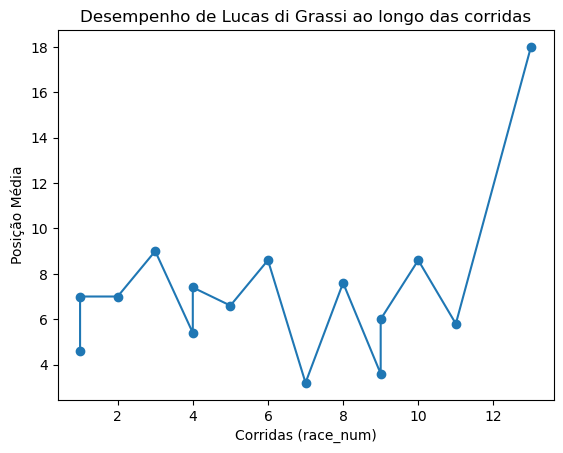

In [105]:
# plotando o grafico
pilot_data = season_performance_df[season_performance_df['driver'] == 'Lucas di Grassi']
plt.plot(pilot_data['interval_start'], pilot_data['avg_position'], marker='o')
plt.title(f'Desempenho de Lucas di Grassi ao longo das corridas')
plt.xlabel('Corridas (race_num)')
plt.ylabel('Posição Média')
plt.show()